In [1]:
import torch
from torch import nn
#
from model import ConvAutoEncoder
from dataset import get_dataset
from train import test

In [2]:
model = ConvAutoEncoder()
ckpt_path = 'ckpts/e027ae_mnist.pt'
ckpt = torch.load(ckpt_path)
model.load_state_dict(ckpt)

<All keys matched successfully>

In [3]:
train_data, test_data = get_dataset('mnist')
criterion = nn.MSELoss()
device = torch.device('cuda')
model = model.to(device)

In [5]:
print('Test loss')
test(model, test_data, 0, criterion, 5, device=device)

Test loss


100%|██████████| 157/157 [00:00<00:00, 200.17it/s]


0.00087585742585361

In [57]:
iter_d = iter(test_data)
i1 = iter_d.next()[0][0]
i2 = iter_d.next()[0][4]

In [44]:
import matplotlib.pyplot as plt

In [103]:
def im_show(data):
    plt.axis('off')
    return plt.imshow(data.squeeze(), cmap='gray')

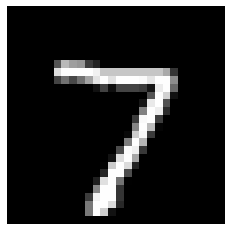

In [105]:
im_show(i1)

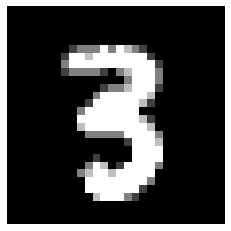

In [106]:
im_show(i2)

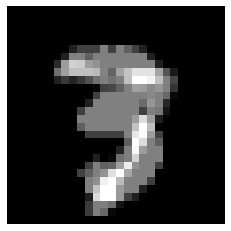

In [107]:
im_show(((i1 + i2) / 2))

In [108]:
model = model.to('cpu')

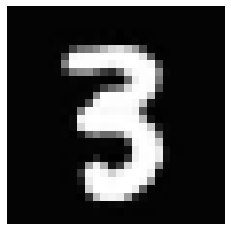

In [109]:
z1 = model.encoder(i1.unsqueeze(dim=0))
# im_show(model.decoder(z1).detach())
z2 = model.encoder(i2.unsqueeze(dim=0))
im_show(model.decoder(z2).detach())

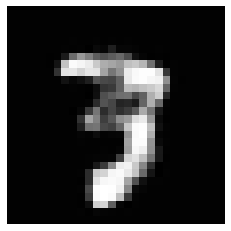

In [110]:
z = z1 * 0.5 + z2 * 0.5
im_show(model.decoder(z).detach())

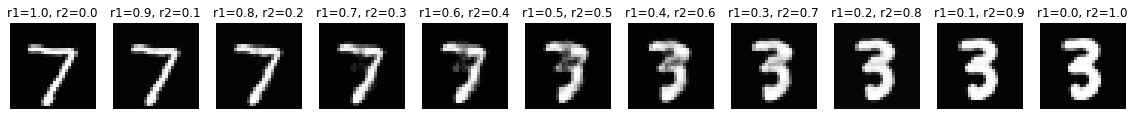

In [154]:
def print_z1z2(z1, z2):
    plt.figure(figsize=(20, 10))
    for i in range(0, 10 + 1):
        r1 = (10 - i) * 0.1
        r2 = 1 - r1
#         print('ratio', r1, r2)
        z = z1 * r1 + z2 * r2

        plt.subplot(1, 11, i + 1)
        plt.title('r1={:.02}, r2={:.02}'.format(r1, r2))
        im_show(model.decoder(z).detach())
    plt.show()
print_z1z2(z1, z2)

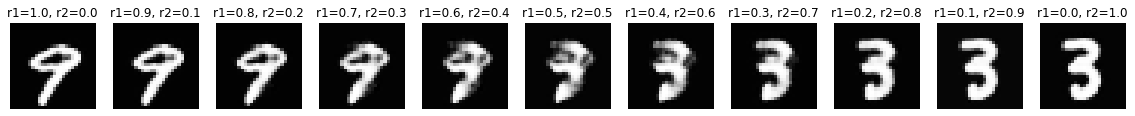

In [155]:
iter_d = iter(test_data)
zz1 = iter_d.next()[0][9]
zz2 = iter_d.next()[0][4]
print_z1z2(model.encoder(zz1.unsqueeze(dim=0)), model.encoder(zz2.unsqueeze(dim=0)))

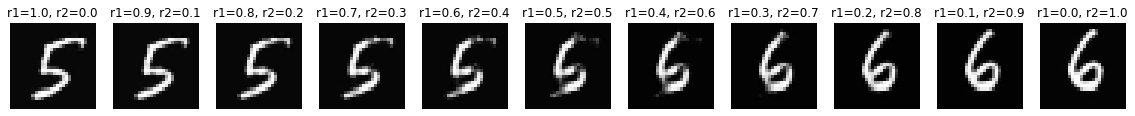

In [166]:
iter_d = iter(test_data)
zz1 = iter_d.next()[0][23]
zz2 = iter_d.next()[0][27]
print_z1z2(model.encoder(zz1.unsqueeze(dim=0)), model.encoder(zz2.unsqueeze(dim=0)))